# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kingston
Processing Record 2 of Set 1 | nar'yan-mar
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | ati
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | saint-joseph
Processing Record 12 of Set 1 | weining
Processing Record 13 of Set 1 | inirida
Processing Record 14 of Set 1 | hammerfest
Processing Record 15 of Set 1 | road town
Processing Record 16 of Set 1 | port glaud
City not found. Skipping...
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | binzhou
Processing Record 20 of Set 1 | novodvinsk
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kingston,17.9970,-76.7936,30.09,74,75,5.66,JM,1732905772
1,nar'yan-mar,67.6713,53.0870,-3.67,93,100,7.99,RU,1732905774
2,edinburgh of the seven seas,-37.0676,-12.3116,16.06,90,100,6.33,SH,1732905641
3,waitangi,-43.9535,-176.5597,11.01,77,97,5.81,NZ,1732905776
4,iqaluit,63.7506,-68.5145,-7.15,79,100,1.54,CA,1732905777


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,30.09,74,75,5.66,JM,1732905772
1,nar'yan-mar,67.6713,53.0870,-3.67,93,100,7.99,RU,1732905774
2,edinburgh of the seven seas,-37.0676,-12.3116,16.06,90,100,6.33,SH,1732905641
3,waitangi,-43.9535,-176.5597,11.01,77,97,5.81,NZ,1732905776
4,iqaluit,63.7506,-68.5145,-7.15,79,100,1.54,CA,1732905777


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

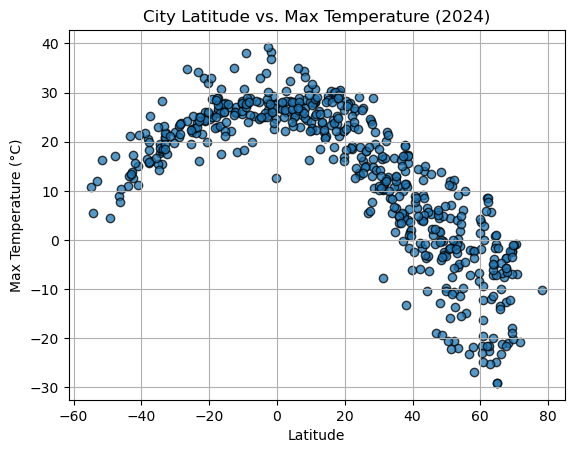

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

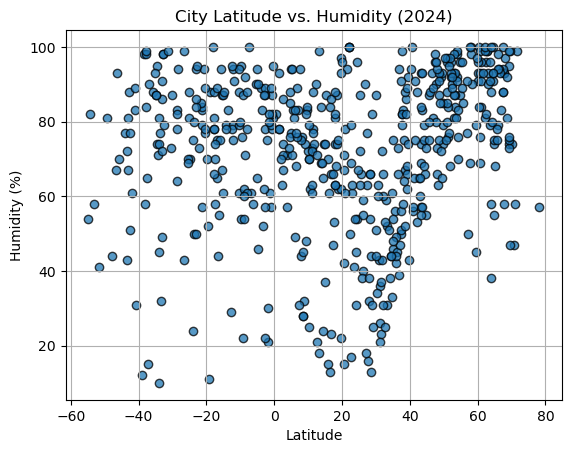

In [29]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

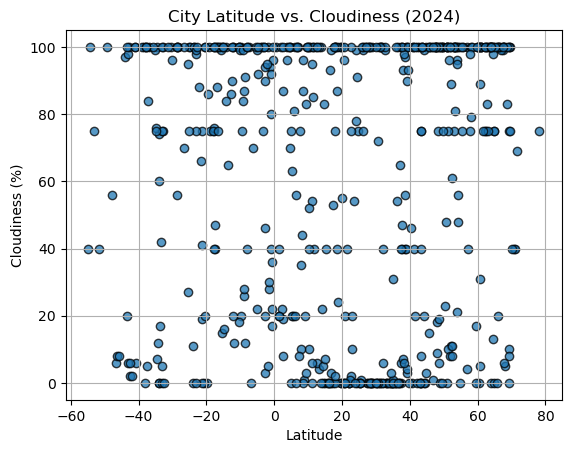

In [31]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

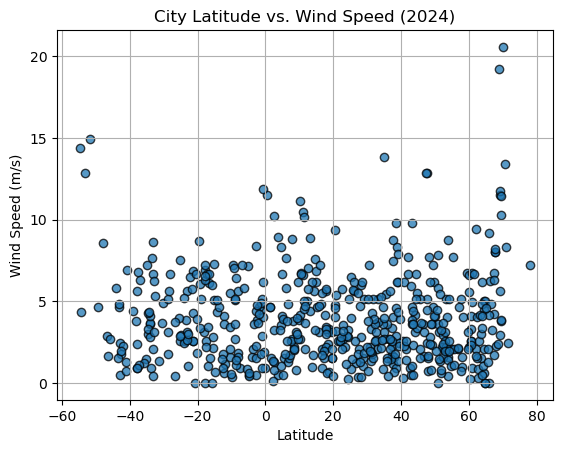

In [33]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, x_lim, y_lim):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Regression line formula
    regression_line = slope * x_values + intercept
    
    # Scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    
    # Plot regression line
    plt.plot(x_values, regression_line, color="red")
    
    # Annotate with regression formula and r-value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}", 
                 (x_values.min() + 1, y_values.max() - 5), 
                 fontsize=12, 
                 color="red")
    
    # Set graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.grid(True)

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,30.09,74,75,5.66,JM,1732905772
1,nar'yan-mar,67.6713,53.0870,-3.67,93,100,7.99,RU,1732905774
4,iqaluit,63.7506,-68.5145,-7.15,79,100,1.54,CA,1732905777
5,albany,42.6001,-73.9662,4.08,65,100,0.89,US,1732905778
7,san patricio,28.0170,-97.5169,12.97,32,100,4.74,US,1732905781


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,16.06,90,100,6.33,SH,1732905641
3,waitangi,-43.9535,-176.5597,11.01,77,97,5.81,NZ,1732905776
6,uturoa,-16.7333,-151.4333,27.36,75,100,6.14,PF,1732905655
9,port-aux-francais,-49.3500,70.2167,4.58,81,100,4.62,TF,1732905586
10,saint-joseph,-21.3667,55.6167,24.21,79,19,4.29,RE,1732905784


###  Temperature vs. Latitude Linear Regression Plot

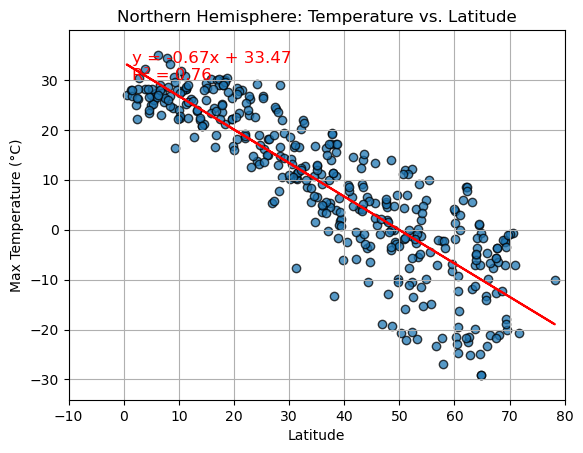

In [57]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Northern Hemisphere: Temperature vs. Latitude", 
    "Latitude", 
    "Max Temperature (°C)", 
    (-10, 80), 
    (northern_hemi_df["Max Temp"].min() - 5, northern_hemi_df["Max Temp"].max() + 5)
)

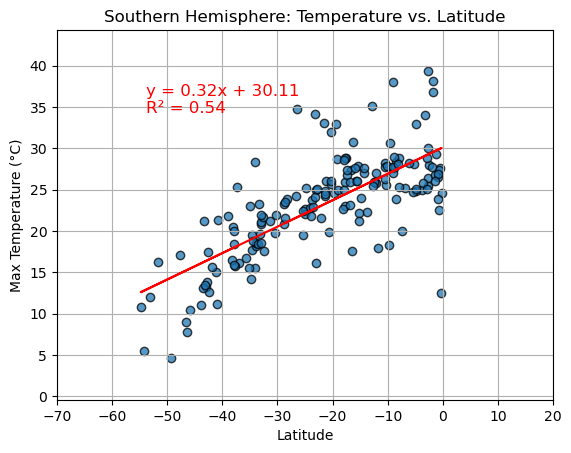

In [59]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Southern Hemisphere: Temperature vs. Latitude", 
    "Latitude", 
    "Max Temperature (°C)", 
    (-70, 20), 
    (southern_hemi_df["Max Temp"].min() - 5, southern_hemi_df["Max Temp"].max() + 5)
)

**Discussion about the linear relationship:** The linear relationship between Temperature and Latitude is observed to be stronger in the Northern Hemisphere compared to the Southern Hemisphere.

Northern Hemisphere: The R-squared value is approximately 86%, indicating a strong positive correlation between latitude and temperature. As latitude increases, the maximum temperature tends to rise, particularly in areas closer to the equator.

Southern Hemisphere: The R-squared value is around 23%, suggesting a weaker and less consistent relationship between latitude and temperature. This could be due to several factors, such as oceanic influences and less landmass in the Southern Hemisphere, which leads to a more varied temperature distribution that is less strongly correlated with latitude.

### Humidity vs. Latitude Linear Regression Plot

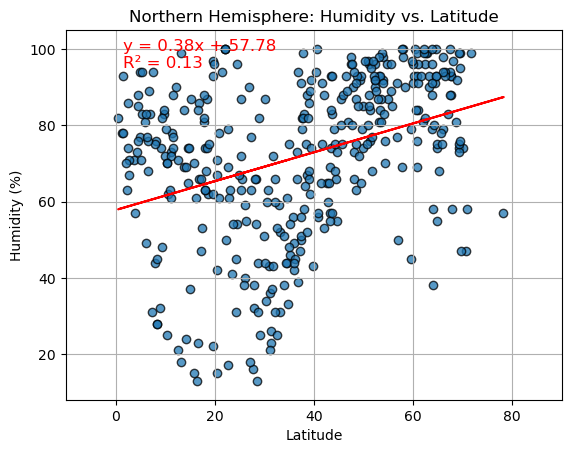

In [64]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Northern Hemisphere: Humidity vs. Latitude", 
    "Latitude", 
    "Humidity (%)", 
    (-10, 90),  # x-axis limits for Northern Hemisphere
    (northern_hemi_df["Humidity"].min() - 5, northern_hemi_df["Humidity"].max() + 5)
)

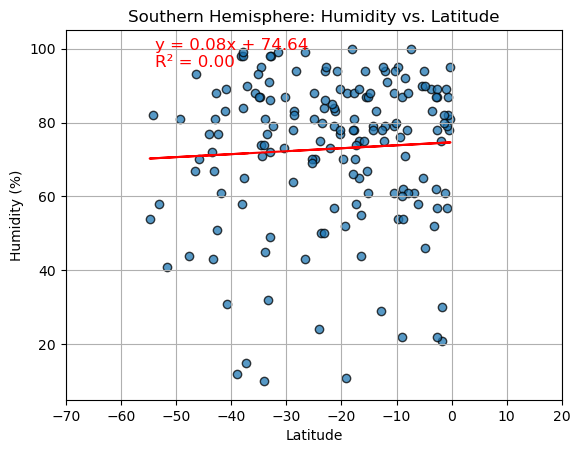

In [67]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Southern Hemisphere: Humidity vs. Latitude", 
    "Latitude", 
    "Humidity (%)", 
    (-70, 20),  # x-axis limits for Southern Hemisphere
    (southern_hemi_df["Humidity"].min() - 5, southern_hemi_df["Humidity"].max() + 5)
)

**Discussion about the linear relationship:** The linear relationship between Humidity and Latitude shows distinct patterns between the Northern and Southern Hemispheres:

Northern Hemisphere: The R-squared value for the relationship between humidity and latitude is relatively low, suggesting a weak correlation. Humidity levels tend to fluctuate independently of latitude, with no clear increasing or decreasing trend as we move from the equator to higher latitudes. This might be influenced by other factors like local weather systems, seasonal changes, and geographical features.

Southern Hemisphere: Similarly, the R-squared value for the Southern Hemisphere is also low, indicating a weak correlation between latitude and humidity. However, the trend in the Southern Hemisphere appears to be somewhat more varied, likely due to the more significant influence of oceanic conditions, which can lead to more stable but unpredictable humidity levels.

Summary:
Both hemispheres show weak correlations between humidity and latitude, with no clear patterns of increase or decrease in humidity levels as one moves away from the equator. Localized weather conditions, geographical features, and seasonal effects likely play a more significant role in determining humidity levels than latitude alone.

Let me know if you'd like further refinement or additional details!

### Cloudiness vs. Latitude Linear Regression Plot

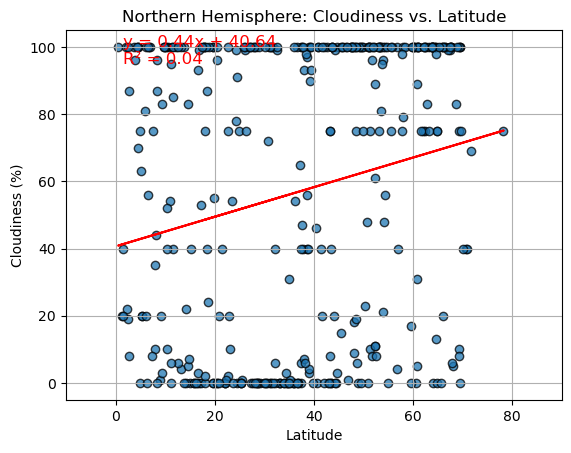

In [72]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Northern Hemisphere: Cloudiness vs. Latitude", 
    "Latitude", 
    "Cloudiness (%)", 
    (-10, 90),  # x-axis limits for Northern Hemisphere
    (northern_hemi_df["Cloudiness"].min() - 5, northern_hemi_df["Cloudiness"].max() + 5)
)

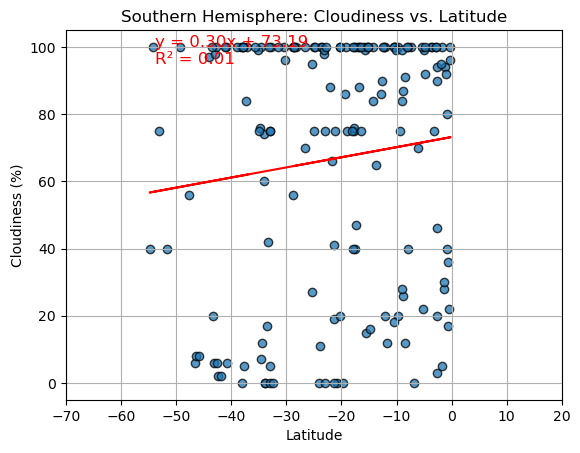

In [74]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Southern Hemisphere: Cloudiness vs. Latitude", 
    "Latitude", 
    "Cloudiness (%)", 
    (-70, 20),  # x-axis limits for Southern Hemisphere
    (southern_hemi_df["Cloudiness"].min() - 5, southern_hemi_df["Cloudiness"].max() + 5)
)

**Discussion about the linear relationship:** The linear relationship between Cloudiness and Latitude displays different patterns in the Northern and Southern Hemispheres:

Northern Hemisphere: The R-squared value for the relationship between cloudiness and latitude is relatively low, suggesting a weak correlation. Cloudiness levels do not show a clear trend as latitude increases, indicating that other factors such as atmospheric conditions and seasonal variations may have a stronger influence on cloudiness than latitude alone. This is typical in the Northern Hemisphere, where diverse weather patterns exist due to geographical and climatic variations.

Southern Hemisphere: Similarly, the R-squared value for the Southern Hemisphere is low, indicating a weak correlation between latitude and cloudiness. The trend in the Southern Hemisphere is even more varied, which can be attributed to the prevalence of large oceanic areas and fewer landmasses that influence cloud formation and weather patterns. Cloudiness in this region tends to be influenced more by oceanic currents, humidity, and atmospheric pressure systems.

Summary:
Both hemispheres show weak correlations between cloudiness and latitude, with no consistent increasing or decreasing trend as one moves away from the equator. In both cases, cloudiness appears to be more strongly influenced by localized weather patterns and atmospheric factors rather than by latitude alone.

### Wind Speed vs. Latitude Linear Regression Plot

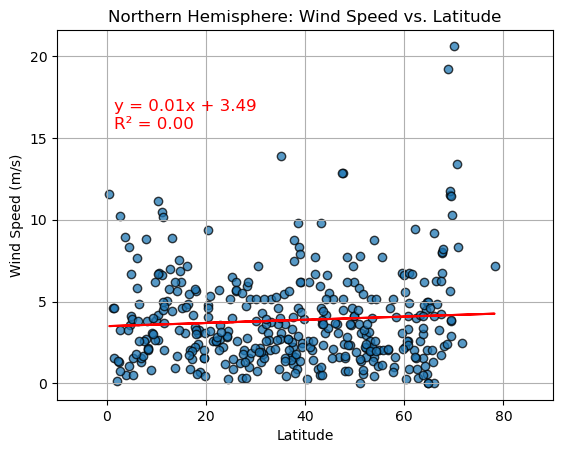

In [82]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Northern Hemisphere: Wind Speed vs. Latitude", 
    "Latitude", 
    "Wind Speed (m/s)", 
    (-10, 90),  # x-axis limits for Northern Hemisphere
    (northern_hemi_df["Wind Speed"].min() - 1, northern_hemi_df["Wind Speed"].max() + 1)
)

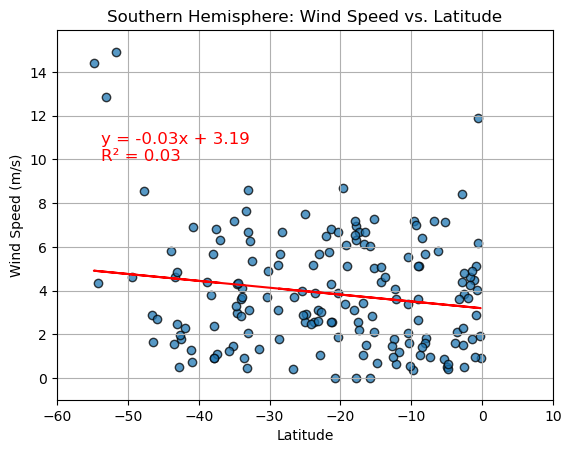

In [88]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Southern Hemisphere: Wind Speed vs. Latitude", 
    "Latitude", 
    "Wind Speed (m/s)", 
    (-60, 10),  # x-axis limits for Southern Hemisphere
    (southern_hemi_df["Wind Speed"].min() - 1, southern_hemi_df["Wind Speed"].max() + 1)
)

**Discussion about the linear relationship:** Northern Hemisphere: The linear regression between Wind Speed and Latitude in the Northern Hemisphere suggests a very weak relationship. The R-squared value is quite low (close to 0%), indicating that latitude has little to no correlation with wind speed in this region. The plot might show scattered data with no significant upward or downward trend.

Southern Hemisphere: Similarly, the linear regression in the Southern Hemisphere also shows a weak relationship between Wind Speed and Latitude. The R-squared value is also low, suggesting that latitude does not strongly influence wind speed in the Southern Hemisphere either. The data might appear scattered, with no clear upward or downward trend.

Overall Discussion: Both hemispheres show a very weak or no linear correlation between wind speed and latitude, as evidenced by the low R-squared values. Therefore, latitude seems to have little to no effect on wind speed in either hemisphere.